DSCI100 Group Project: Individual Project Planning Report

1. Data description

Please install the repr package and tidyverse package, and download the data folder from the github repository (located at the bottom of the Jupyter Notebook) for the codes to be ran smoothly.

In [1]:
library(repr)
library(tidyverse)
options(repr.matrix.max.rows = 5)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


>Firstly, the sessions data would not be examined because the question this proposal is trying to address does not use the sessions data.

>Then, the players data would be examined.

In [2]:
sessions <- read_csv("Data/sessions.csv")
players <- read_csv("Data/players.csv")
head(players, 3)

Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17


>As we can see, the players data consists of 196 observations with 7 variables:

|Variables|What they are|
|---|---|
|experience|How good the user is at the game, cannot be used as categorical and numerical operations because it is a string|
|subscribe|Whether the user is a subscriber of the program|
|hashedEmail|the encrypted email names of the users, cannot be used as categorical and numerical operations because it is a string|
|played_hours|Number of hours spent by the user on the game|
|name|the name of the user, cannot be used as a categorical variable because it is a string| 
|gender|the gender of the user, cannot be used as a categorical variable because it is a string|
|Age|Age of the user|

>The data is clean as each cell corresponds to one variable, and each row is only about one observation.

>An observation in this dataframe corersponds to one player of MineCraft.

>One potential issue is that some data wrangling would have to be done on columns such as experience and gender to turn them into factors using as_factor(), so that we can treat them as categorical values for further analysis.

 2. Questions

I would like to address Question 2: We would like to know which "kinds" of players are most likely to contribute a large amount of data so that we can target those players in our recruiting efforts.

In particular, whether we are able to predict the number of hours played from level of experience and age, and whether gender would affect the correlation between age, played hours and experience on sandbox games like minecraft. We would like to predict the number of hours played as the longer a players stays engaged with the game, the more data is generated for analysis.

3. Exploratory Data Analysis and Visualization

Just in case i have accidentally changed the dataframe data. The sessions and players data will be loaded into R again.

In [3]:
head(sessions, 3)
head(players, 3)

hashedEmail,start_time,end_time,original_start_time,original_end_time
<chr>,<chr>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024 18:12,30/06/2024 18:24,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024 23:33,17/06/2024 23:46,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024 17:34,25/07/2024 17:57,1.72193e+12,1.72193e+12


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17


The sessions data contains untidy data. Therefore, the start_time and end_time will be further separated into start_date, start_time, end_date and end_time. 

Moreover, the data frame will be cross-referenced with the players data to assign the name of the user for each individual sessions for better readability.

In [4]:
sessions_wr <- sessions |>
    separate(start_time, into = c("start_date", "start_time"), sep = " ") |>
    separate(end_time, into = c("end_date", "end_time"), sep = " ") |>
    mutate(individual_session_length = original_end_time - original_start_time) |>
    left_join(players, by = "hashedEmail") |>
    select(name, hashedEmail, start_date, start_time, end_date, end_time, original_start_time, original_end_time, individual_session_length)
sessions_wr

name,hashedEmail,start_date,start_time,end_date,end_time,original_start_time,original_end_time,individual_session_length
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
Hiroshi,bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024,18:12,30/06/2024,18:24,1.71977e+12,1.71977e+12,0
Alex,36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024,23:33,17/06/2024,23:46,1.71867e+12,1.71867e+12,0
Delara,f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024,17:34,25/07/2024,17:57,1.72193e+12,1.72193e+12,0
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
Dana,fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,25/07/2024,06:15,25/07/2024,06:22,1.72189e+12,1.72189e+12,0
Alex,36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,20/05/2024,02:26,20/05/2024,02:45,1.71617e+12,1.71617e+12,0


As the players data are alreay very tidy, only the mean value for each quantitative variable in the players.csv data set will be computed.

In [5]:
players
players |>
    select(played_hours, Age) |>
    map_dfr(mean, na.rm=TRUE)

experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
⋮,⋮,⋮,⋮,⋮,⋮,⋮
Amateur,FALSE,f19e136ddde68f365afc860c725ccff54307dedd13968e896a9f890c40aea436,2.3,Harlow,Male,17
Pro,TRUE,d9473710057f7d42f36570f0be83817a4eea614029ff90cf50d8889cdd729d11,0.2,Ahmed,Other,NA


played_hours,Age
<dbl>,<dbl>
5.845918,21.13918


As we can see, the mean total play time is 5.85 hours and average age of players are 21.14 years old.

Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”


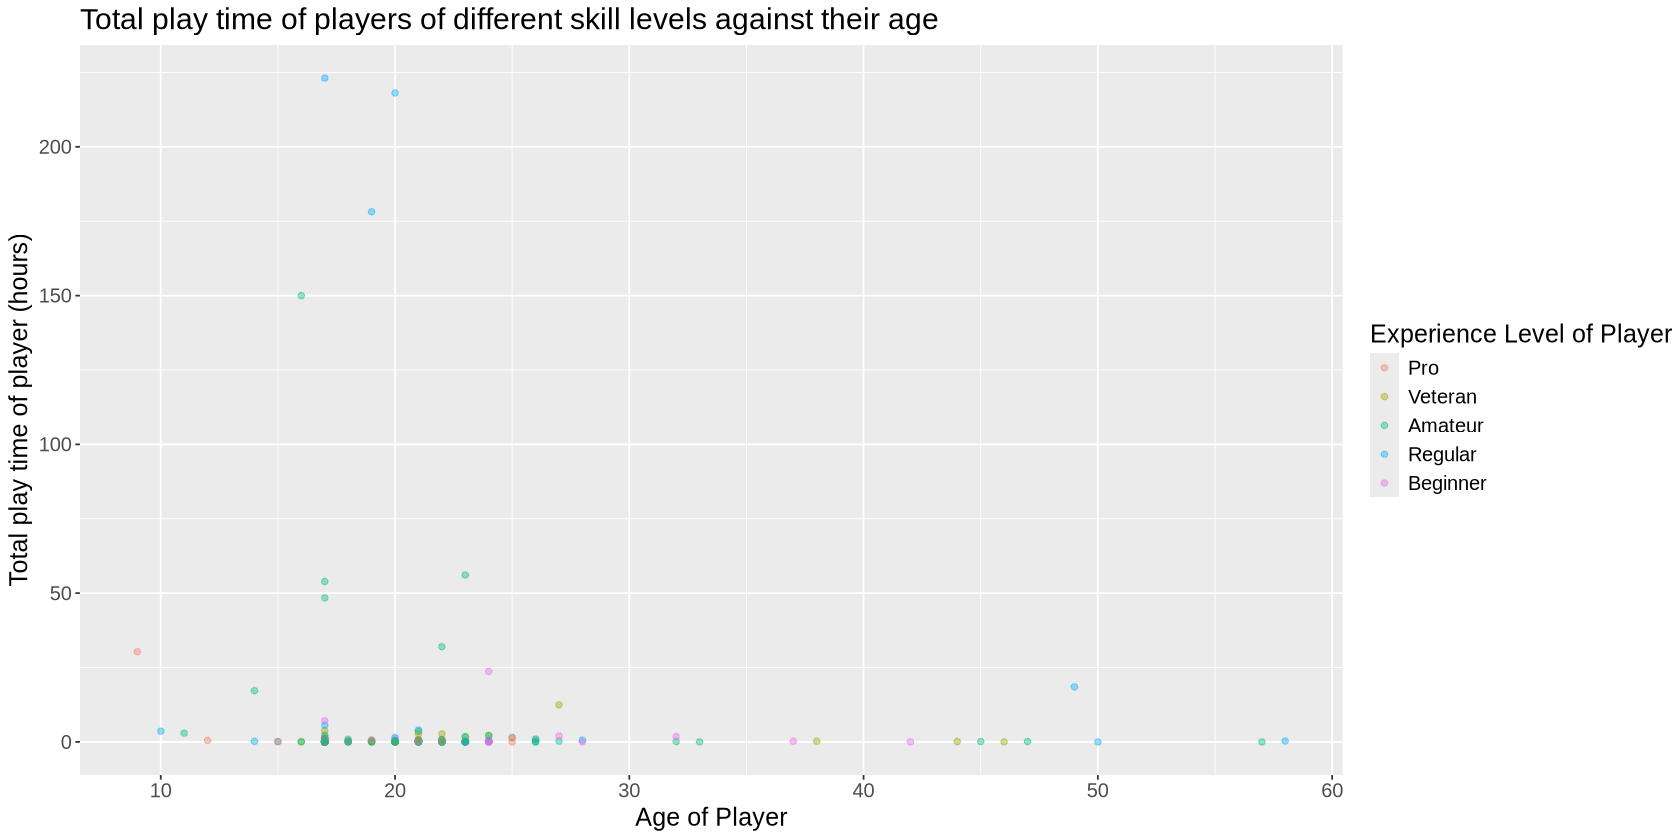

In [6]:
options(repr.plot.height=7, repr.plot.width=14)
players_exp_vis <- players |>
    mutate(experience=as_factor(experience)) |>
    ggplot(aes(x=Age, y=played_hours, color= experience)) +
    geom_point(alpha = 0.4) +
    labs(x= "Age of Player", y="Total play time of player (hours)", color= "Experience Level of Player", title = "Total play time of players of different skill levels against their age") +
    theme(text = element_text(size=15))
players_exp_vis

From the graph generated above, we can see that there is a non-linear relationship between age and total play time, but rather that it is a bell curve that peaks at around age 20. 

Moreover, the players with the highest play time are players around amateur and regular skill level. 

This means that we can extract the most data from people around their 20s at amateur or regular skill level.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


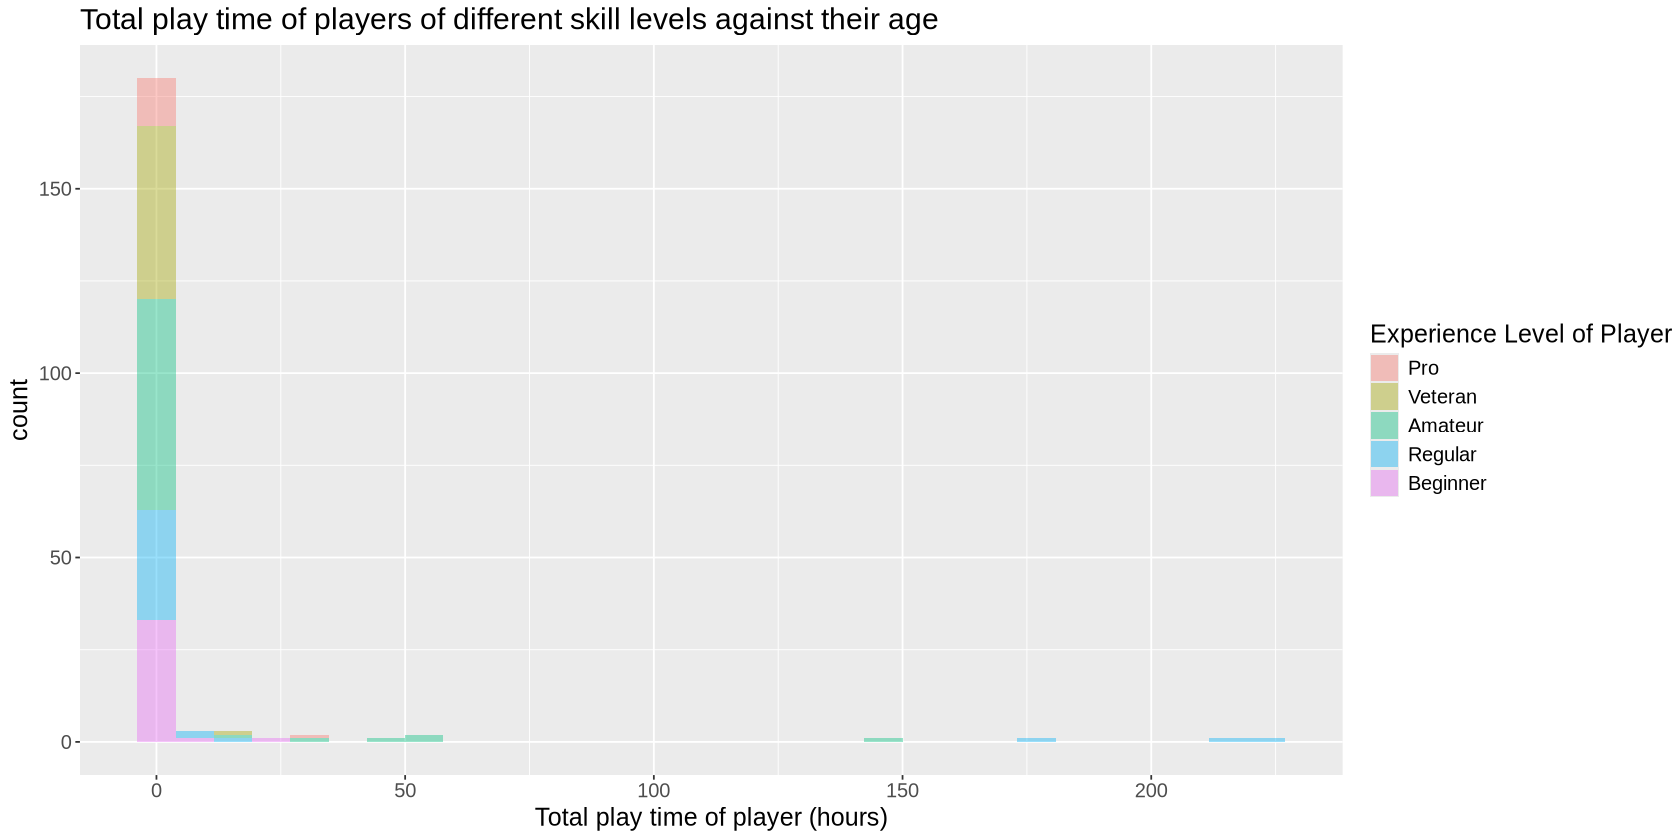

In [7]:
options(repr.plot.height=7, repr.plot.width=14)
players_exp_his <- players |>
    mutate(experience=as_factor(experience)) |>
    ggplot(aes(x=played_hours, fill= experience)) +
    geom_histogram(alpha = 0.4) +
    labs(x= "Total play time of player (hours)", fill= "Experience Level of Player", title = "Total play time of players of different skill levels against their age") +
    theme(text = element_text(size=15))
players_exp_his

From the histogram generated, we can see that most of the players across all skill levels played the game for a very short time, except Amateur and Regular players. 

This means that if we were to maximise data collection, recruiting amateur and regularly-skilled players would be most willing to produce a larger amount of data.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


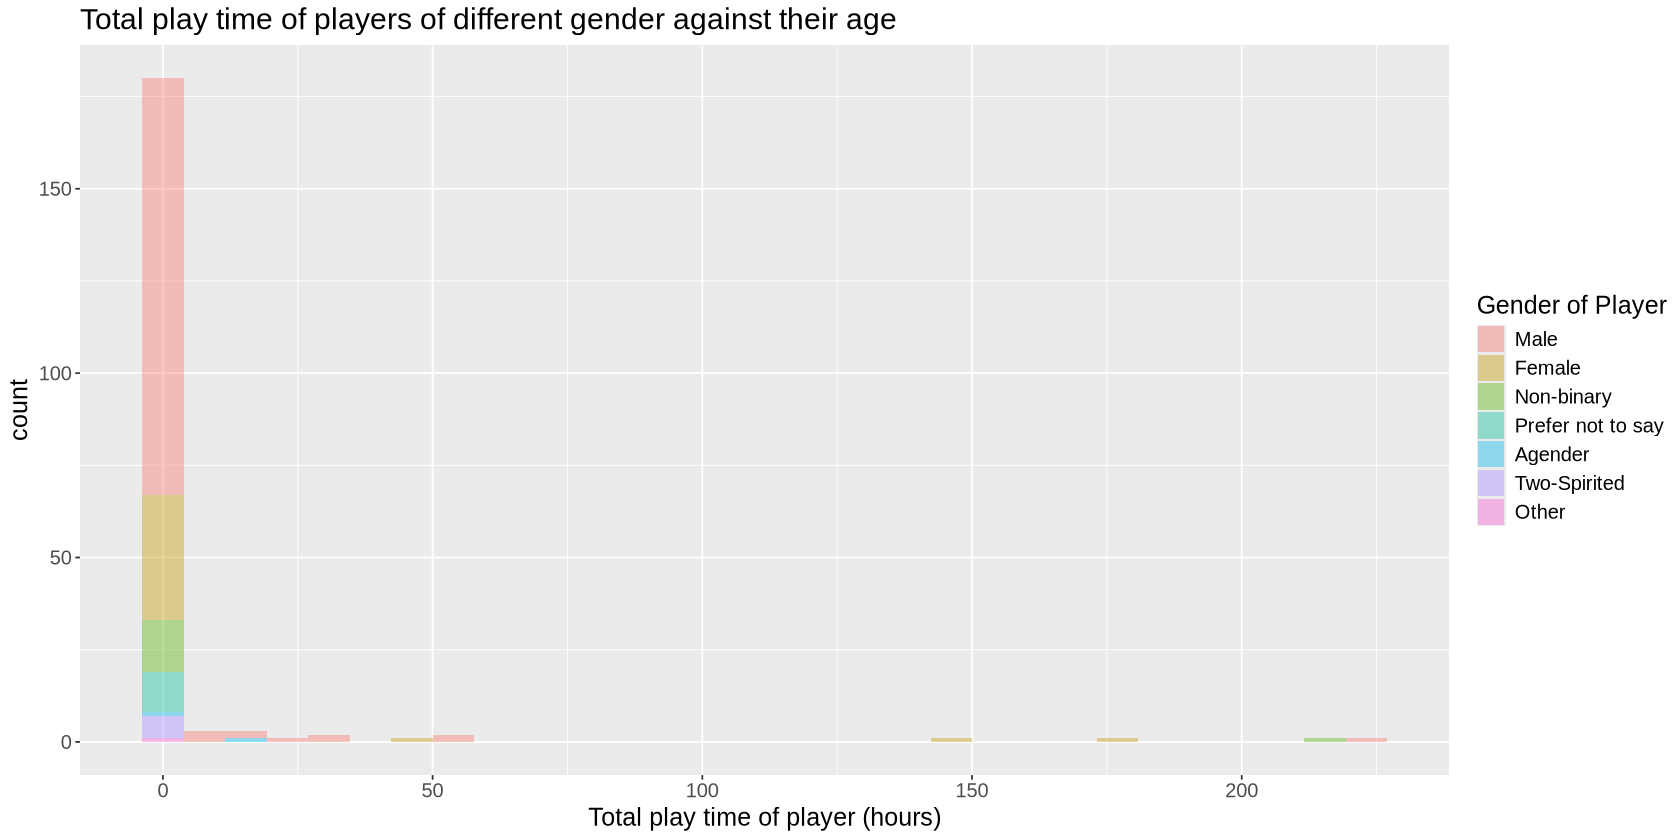

In [8]:
options(repr.plot.height=7, repr.plot.width=14)
players_gen_his <- players |>
    mutate(gender=as_factor(gender)) |>
    ggplot(aes(x=played_hours, fill= gender)) +
    geom_histogram(alpha = 0.4) +
    labs(x= "Total play time of player (hours)", fill= "Gender of Player", title = "Total play time of players of different gender against their age") +
    theme(text = element_text(size=15))
players_gen_his

From the graph above, we can see that most people among different gender stopped playing the game after a short time. 

Among the people who stayed for the longest time, there is almost an equal ratio of females, males and non-binary that played the game for more than 150 hours. This means that there are males, females or non-binary people willing to play the game for a long time, if we were to maximise play time for data collection per user. 

However, for the players that played an intermediate amount of time (from >0 to 100 hours), the gender demographic is mostly comprised of males. This means that recruiting males would be more likely to consistently yield data for analysis because males are less likely to abandon the game after a short time when compared to other demographics.

To summarise, it is possible to get a lot of data for analysis from recruiting males, females and non-binary people. However, recruiting males would allow collection of data more consistently, as there are more males among the demographic that is less likely to abandon the game after a short time.

4. methods and plan

5. Github repository

Link to my Github repository: https://github.com/terri2003/DSCI100GroupProjectIndividualPlanning